In [1]:
from xgboost import XGBRegressor
import bs4
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.datasets import load_digits
from math import sqrt

In [3]:
df = pd.read_excel('vehicle.xlsx', engine = 'openpyxl')
df = df[:-31]
df_ = df[-31:]
df.head(3)

,Unnamed: 0,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1.0,1626.0,325.0,4.0,730.0,800.0,AMG GT Black Series,403.62,337800,3.1
1,2.0,1525.0,354.0,6.5,770.0,720.0,Lamborghini Aventador SVJ,404.97,432300,2.8
2,3.0,650.0,290.0,2.8,455.0,380.0,Radical SR8LM,408.00,NaN,3.3


In [23]:
Y_data_ = df["laptime"].values
# X_data_ = df[["CurbWeight","TopSpeed", "Power","Torque","Zero"]].values
X_data_ = df[["CurbWeight","Displacement","TopSpeed", "Power","Torque","Zero"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X_data_, Y_data_, test_size=0.2, random_state=1234)

In [8]:
depth_grid = np.arange(1,21)                                    # 하이퍼파라미터의 범위 설정
parameters = {'max_depth':depth_grid}

In [9]:
gridCV = GridSearchCV(XGBRegressor(), parameters, cv=10, n_jobs = -1)      # XGBoostRegressor함수 입력
gridCV.fit(X_train, Y_train)                                                # 데이터의 최적화된 하이퍼파라미터의 찾기
best_depth = gridCV.best_params_['max_depth'] 
best_learning_rate = gridCV.best_params_['learning_rate']
best_n_estimators = gridCV.best_params_['n_estimators']
best_verbosity = gridCV.best_params_['verbosity']

[12:21:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:21:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:21:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:21:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:21:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[12:21:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned

In [100]:
XGBR_best = XGBRegressor(max_depth=4) #learning_rate=0.06, n_estimators=300,verbosity = 2 )
XGBR_best.fit(X_train, Y_train)                                             # 최적화된 하이퍼파라미터를 입력하고 훈련
Y_pred = XGBR_best.predict(X_test)                                          # 예측모델의 Test데이터를 이용하여 RMSE 출력
print( "Tree best RMSE : " + str(np.round(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),3)))

[14:31:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:31:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:31:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:31:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:31:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:31:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned

In [101]:
best_depth = gridCV.best_params_['max_depth'] 
best_learning_rate = gridCV.best_params_['learning_rate']
best_n_estimators = gridCV.best_params_['n_estimators']
best_verbosity = gridCV.best_params_['verbosity']
print(best_depth, best_learning_rate, best_n_estimators,best_verbosity)

3 0.060000000000000005 200 2


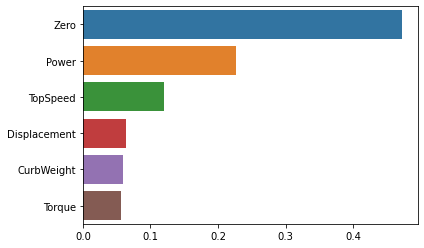

In [102]:
import seaborn as sns
variable_names = ["CurbWeight","Displacement","TopSpeed", "Power","Torque","Zero"]
variable_importance = pd.Series(XGBR_best.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

In [103]:

print( "Tree best SCORE : " + str(XGBR_best.score(X_test,Y_test).round(2)))

Tree best SCORE : 0.7


In [104]:
# df_ = pd.read_excel('vehicle.xlsx', engine = 'openpyxl')
# df = df_[:-31]
# df_ = df_[-31:]
# Y_data = df["laptime"].values                 # X 데이터, Y 데이터로 나눈 뒤 Train 데이터, Test 데이터로 나눔
# X_data = df[["CurbWeight","Displacement","TopSpeed", "Power","Torque","Zero"]].values


In [105]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2,random_state=1234)
# XGBR_best = XGBRegressor(max_depth=4,min_samples_leaf=2,max_leaf_nodes=2)
# XGBR_best.fit(X_train, Y_train)                                             # 최적화된 하이퍼파라미터를 입력하고 훈련
# Y_pred = XGBR_best.predict(X_test)                                          # 예측모델의 Test데이터를 이용하여 RMSE 출력
# print( "Tree best RMSE : " + str(np.round(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),3)))

In [106]:
print( "Tree best SCORE : " +str(XGBR_best.score(X_test,Y_test).round(2)))
Y_pred = XGBR_best.predict(X_data_)   

Tree best SCORE : 0.7


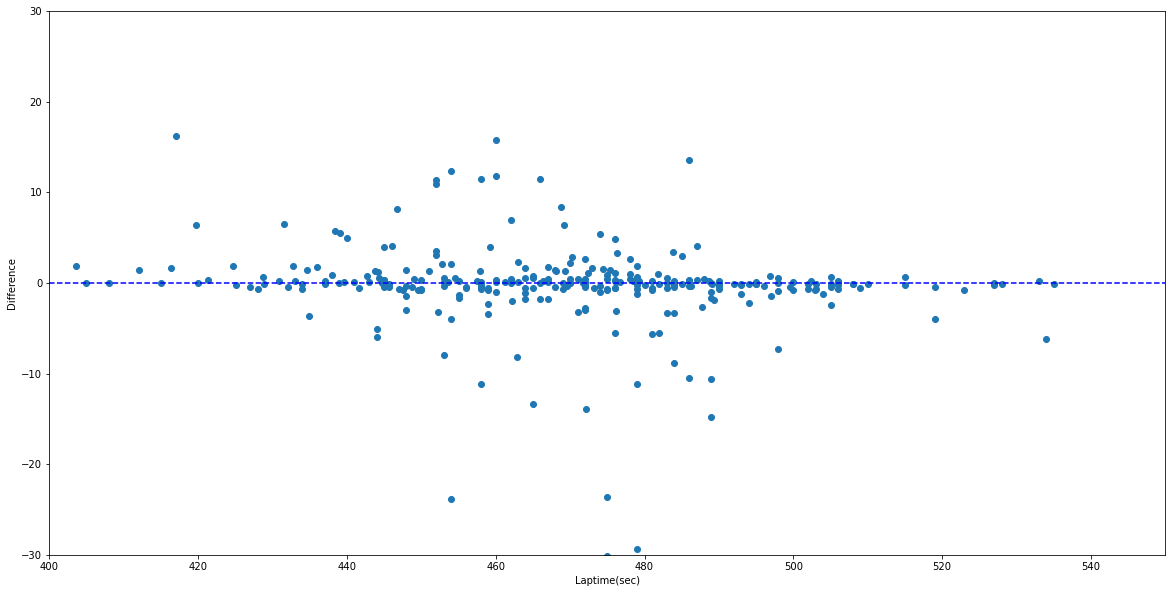

In [107]:
plt.figure(figsize = (20,10))                                                   # 예측모델의 Test데이터를 이용하여 RMSE 출력
plt.plot([400,550],[0,0],'--', c ='blue')
plt.xlabel("Laptime(sec)")
plt.ylabel("Difference")
plt.axis([400,550,-30,30])
plt.scatter(Y_data_,Y_pred-Y_data_)
plt.show()

In [74]:
X_Korea = df_[["CurbWeight","Displacement","TopSpeed", "Power","Torque","Zero"]].values
X_Korea = X_Korea[:-2]
Y_pred = XGBR_best.predict(X_Korea)      

In [75]:
print("{:15}|{:5}".format("차종", "Laptime"))
print(35 * "-")
for c, l in zip(df_["vehicle"][:-2],Y_pred):
    min = int(l//60)
    sec =round(l%60,2)
    print("{:15}|| {}:{:3}".format(str(c), str(min),str(sec)))


차종             |Laptime
-----------------------------------
BMW M3 E46     || 8:20.06
BMW M3 E36/8   || 8:22.77
Mercedes-Benz C55 AMG (W203)|| 8:17.25
Nissan Skyline GT-R R32|| 8:19.81
Chevrolet Cobalt SS/TC (2007)|| 8:23.42
Porsche Boxster S (987, 2006)|| 8:18.14
Porsche 911 Carrera RS (964)|| 8:23.26
Mitsubishi Lancer Evo VI|| 8:17.99
Mitsubishi Lancer Evo VII|| 8:23.04
Lotus Exige S  || 8:12.7
Jaguar XKR     || 8:23.83
Porsche Cayman S (987)|| 8:22.88
Audi S5        || 8:24.65
BMW 335i Coupé (E92)|| 8:25.86
Ford Focus RS (Mk2)|| 8:21.78
Nissan 350Z    || 8:27.27
Mini John Cooper Works Pro (F56)|| 8:28.26
Porsche 911 Carrera (993)|| 8:25.72
Audi TTS Coupé || 8:23.15
Alfa Romeo Giulietta QV|| 8:31.74
Ford Focus ST  || 8:34.95
Opel Astra OPC 2.0T (240PS)|| 8:31.55
Honda S2000    || 8:26.91
Mazda MAZDASPEED3 (Mazda3 MPS)|| 8:34.06
Hyundai Genesis Coupe 3.8L|| 8:35.41
Volkswagen Scirocco 2.0 TSI|| 8:46.22
Honda Civic Type-R 2.0i LS|| 8:45.01
Opel Corsa OPC || 8:45.99
Volkswagen Golf GTI 

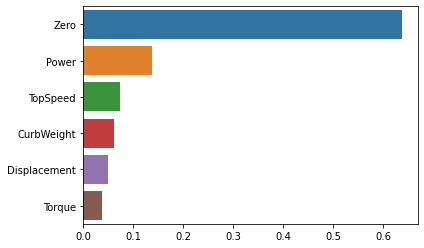

In [32]:
import seaborn as sns
variable_names = ["CurbWeight","Displacement","TopSpeed", "Power","Torque","Zero"]
variable_importance = pd.Series(XGBR_best.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()